<a href="https://colab.research.google.com/github/rohan30497/EEG_Signal_Processing/blob/main/AD_Detection_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns





print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.12.0


In [ ]:
!pip install  tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/train'
test_data_dir = '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/test'

In [ ]:
# Specify the path to the train directory
train_data_dir = '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/train'

# List the files in the train directory, filtering for image file formats (e.g., JPEG, PNG)
image_files = [file for file in os.listdir(train_data_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

num_images_to_display = 5

plt.figure(figsize=(12, 6))

for i, file in enumerate(image_files[:num_images_to_display]):

    img_path = os.path.join(train_data_dir, file)

    img = Image.open(img_path)

    plt.subplot(1, num_images_to_display, i+1)
    plt.imshow(img)
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

In [ ]:
# Data Preprocessing and Augmentation step
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32  # You can adjust this based on your available memory
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Adjust the size as needed
    batch_size=batch_size,
    class_mode='categorical')

Found 5131 images belonging to 4 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Adjust the size as needed
    batch_size=batch_size,
    class_mode='categorical')

Found 1279 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output
    layers.Flatten(),

    # Fully Connected Layer 1
    layers.Dense(128, activation='relu'),

    # Output Layer
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)    

In [ ]:
num_epochs = 10
history = model.fit(
    train_generator,
    epochs=num_epochs,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


Epoch 1/10
161/161 [==============================] - 1792s 11s/step - loss: 1.1144 - accuracy: 0.4859 - val_loss: 1.0110 - val_accuracy: 0.5004
Epoch 2/10
161/161 [==============================] - 790s 5s/step - loss: 0.9849 - accuracy: 0.5204 - val_loss: 0.9455 - val_accuracy: 0.5168
Epoch 3/10
161/161 [==============================] - 780s 5s/step - loss: 0.9425 - accuracy: 0.5397 - val_loss: 1.0155 - val_accuracy: 0.5059
Epoch 4/10
161/161 [==============================] - 748s 5s/step - loss: 0.9276 - accuracy: 0.5482 - val_loss: 0.9469 - val_accuracy: 0.5395
Epoch 5/10
161/161 [==============================] - 783s 5s/step - loss: 0.9161 - accuracy: 0.5578 - val_loss: 1.0597 - val_accuracy: 0.5027
Epoch 6/10
161/161 [==============================] - 783s 5s/step - loss: 0.9088 - accuracy: 0.5570 - val_loss: 0.9607 - val_accuracy: 0.5293
Epoch 7/10
161/161 [==============================] - 751s 5s/step - loss: 0.9012 - accuracy: 0.5634 - val_loss: 1.0673 - val_accuracy: 0.50

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

40/40 [==============================] - 51s 1s/step - loss: 0.9218 - accuracy: 0.5285
Test Accuracy: 52.85%


In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

40/40 [==============================] - 49s 1s/step


In [ ]:
# Get the true class labels
true_classes = test_generator.classes

# Calculate confusion matrix
confusion_mat = confusion_matrix(true_classes, predicted_classes)

In [ ]:
# Calculate classification report (including precision, recall, F1-score)
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_names)

print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[  1   0 130  48]
 [  0   0   8   4]
 [  6   0 488 146]
 [  5   0 348  95]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


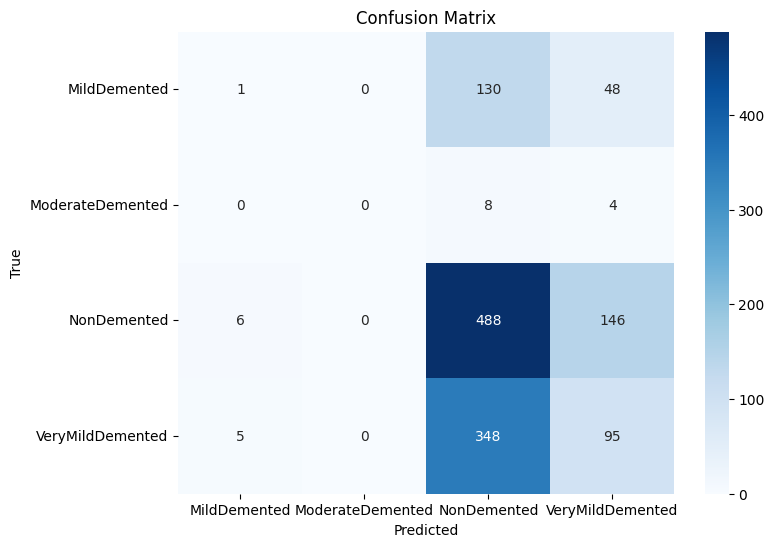

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("\nClassification Report:")
print(report)


Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.08      0.01      0.01       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      0.76      0.60       640
VeryMildDemented       0.32      0.21      0.26       448

        accuracy                           0.46      1279
       macro avg       0.23      0.25      0.22      1279
    weighted avg       0.38      0.46      0.39      1279



As the model is taking much time to train as its training over 11 Lacs weights, so here we can cretae a subdirectory including images randomly selected from each classes and use that training_subdirectory to train the model

In [ ]:
class_dirs = [
    '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/train/MildDemented',
    '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/train/ModerateDemented',
    '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/train/VeryMildDemented',
    '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/train/NonDemented'
]

# Path to the new training subset directory
training_subset_dir = '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/train/training_subset'

# Calculate the maximum number of images that can be sampled from each class
min_images_per_class = min(len(os.listdir(class_dir)) for class_dir in class_dirs)

# Number of images to select from each class (set to the minimum available)
num_images_per_class = min(min_images_per_class, 100)

# Create the training subset directory if it doesn't exist
if not os.path.exists(training_subset_dir):
    os.makedirs(training_subset_dir)

# Randomly select and move images from each class to the training subset directory
for class_dir in class_dirs:
    class_name = os.path.basename(class_dir)
    image_files = [file for file in os.listdir(class_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    selected_images = random.sample(image_files, num_images_per_class)

    # Move the selected images to the training subset directory
    for image in selected_images:
        src_path = os.path.join(class_dir, image)
        dest_path = os.path.join(training_subset_dir, class_name, image)

        # Create the class subdirectory if it doesn't exist in the training subset directory
        os.makedirs(os.path.join(training_subset_dir, class_name), exist_ok=True)

        # Move the image
        shutil.move(src_path, dest_path)

print(f"Randomly selected {num_images_per_class} images from each class and moved them to the training subset directory.")

Randomly selected 52 images from each class and moved them to the training subset directory.


In [ ]:
# Path to the original class subdirectories for the test data
test_class_dirs = [
    '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/test/MildDemented',
    '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/test/ModerateDemented',
    '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/test/VeryMildDemented',
    '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/test/NonDemented'
]


test_subset_dir = '/content/drive/MyDrive/Alzeimers Test Data/Alzheimer_s Dataset/test/test_subset'


min_images_per_test_class = min(len(os.listdir(class_dir)) for class_dir in test_class_dirs)


num_images_per_test_class = min(min_images_per_test_class, 100)


if not os.path.exists(test_subset_dir):
    os.makedirs(test_subset_dir)

for class_dir in test_class_dirs:
    class_name = os.path.basename(class_dir)
    image_files = [file for file in os.listdir(class_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    selected_images = random.sample(image_files, num_images_per_test_class)


    for image in selected_images:
        src_path = os.path.join(class_dir, image)
        dest_path = os.path.join(test_subset_dir, class_name, image)

        os.makedirs(os.path.join(test_subset_dir, class_name), exist_ok=True)


        shutil.move(src_path, dest_path)

print(f"Randomly selected {num_images_per_test_class} images from each class in the test data and moved them to the test subset directory.")


Randomly selected 12 images from each class in the test data and moved them to the test subset directory.


In [ ]:
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    training_subset_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 308 images belonging to 4 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_subset_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

Found 48 images belonging to 4 classes.


In [ ]:
num_epochs = 10
history = model.fit(
    train_generator,
    epochs=num_epochs,
    steps_per_epoch=len(train_generator),
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/10
10/10 [==============================] - 49s 5s/step - loss: 1.2396 - accuracy: 0.5390 - val_loss: 1.2768 - val_accuracy: 0.3542
Epoch 2/10
10/10 [==============================] - 49s 5s/step - loss: 1.1154 - accuracy: 0.5682 - val_loss: 1.2654 - val_accuracy: 0.3750
Epoch 3/10
10/10 [==============================] - 50s 5s/step - loss: 1.0340 - accuracy: 0.5942 - val_loss: 1.3186 - val_accuracy: 0.3750
Epoch 4/10
10/10 [==============================] - 48s 5s/step - loss: 0.9921 - accuracy: 0.5877 - val_loss: 1.1750 - val_accuracy: 0.4167
Epoch 5/10
10/10 [==============================] - 46s 5s/step - loss: 0.9792 - accuracy: 0.5877 - val_loss: 1.1882 - val_accuracy: 0.3542
Epoch 6/10
10/10 [==============================] - 47s 4s/step - loss: 0.9977 - accuracy: 0.5747 - val_loss: 1.1705 - val_accuracy: 0.3333
Epoch 7/10
10/10 [==============================] - 47s 5s/step - loss: 0.9268 - accuracy: 0.5974 - val_loss: 1.1539 - val_accuracy: 0.3958
Epoch 8/10
10/10 [==

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

2/2 [==============================] - 3s 805ms/step - loss: 1.0122 - accuracy: 0.5625
Test Accuracy: 56.25%


##Using VGGNET16 Architecture

In [ ]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
import keras

# Load the VGG16 model with pre-trained weights
vgg16 = VGG16(input_shape=(224, 224, 3), weights="imagenet", include_top=False)

for layer in vgg16.layers:
    layer.trainable = False

x = Flatten()(vgg16.output)
x = Dense(128, activation='relu')(x)
out = Dense(4, activation='softmax')(x)

modelvgg16 = Model(inputs=vgg16.input, outputs=out)

callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                        patience=10,
                                        restore_best_weights=True)

# compiling
modelvgg16.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Summary
modelvgg16.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add a 1D convolutional layer with 64 filters, kernel size 3, and 'relu' activation
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(224,224)))

# Add a max-pooling layer with pool size 2
model.add(MaxPooling1D(pool_size=2))

# Add another convolutional layer with 128 filters, kernel size 3, and 'relu' activation
model.add(Conv1D(128, kernel_size=3, activation='relu'))

# Add another max-pooling layer with pool size 2
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected (dense) layer with 128 units and 'relu' activation
model.add(Dense(128, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer with the appropriate number of units and activation function
model.add(Dense(4, activation='softmax'))  # Replace num_classes with the number of output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_14 (Conv1D)          (None, 222, 64)           43072     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 111, 64)          0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 109, 128)          24704     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 54, 128)          0         
 g1D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 6912)              0         
                                                                 
 dense_28 (Dense)            (None, 128)             